# Imports

In [5]:
import pandas as pd
import numpy as np
from IPython.display import display

# Dataset Creation

In [2]:
features_cols = ['X','Y']
label_col = 'LABEL'

cords_df = pd.DataFrame([[5,0,'Low'], [9,3,'Low'], [8,5,'Low'], [12,8,'Low'], [3,0,'Low'],
                         [1,6,'High'], [5,9,'High'], [0,4,'High'], [9,15,'High'], [7,11,'High']],
                         columns=['X','Y','LABEL'])
cords_df

,X,Y,LABEL
0,5,0,Low
1,9,3,Low
2,8,5,Low
3,12,8,Low
4,3,0,Low
5,1,6,High
6,5,9,High
7,0,4,High
8,9,15,High
9,7,11,High


# Modeling & Evaluation

[I 2020-06-04 12:47:13,205] Finished trial#0 with value: 1.0 with parameters: {'C_11562': 0.1, 'C_21377': 0.5}. Best is trial#0 with value: 1.0.
[I 2020-06-04 12:47:13,483] Finished trial#1 with value: 0.8888888888888888 with parameters: {'C_11562': 0.5, 'C_21377': 0.5}. Best is trial#0 with value: 1.0.
[I 2020-06-04 12:47:13,757] Finished trial#2 with value: 1.0 with parameters: {'C_11562': 0.1, 'C_21377': 0.5}. Best is trial#0 with value: 1.0.


Experiment's name: experiment1.
Start time: 09:47:12 - 04/06/20.
End time: 09:47:14 - 04/06/20.
Num of folds: 3.
Num of k-folds repetitions: 5.

---------------------------------------------------------
Model name: lr.
Score: 0.9777777777777777.

Best hyper-parameters: {}.

Train's observations:


,CLASS,avg_precision,avg_recall
0,High,1.0,1.0
1,Low,1.0,1.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


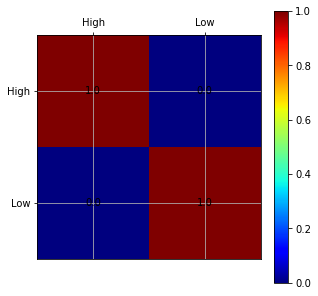


Test's observations:


,CLASS,avg_precision,avg_recall
0,High,1.000000,0.966667
1,Low,0.966667,1.000000


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


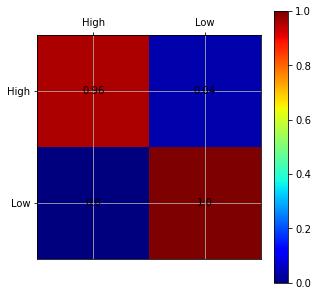



---------------------------------------------------------
Model name: blending.
Score: 0.9222222222222222.

Best hyper-parameters: {'sub_lr1': {'C': 0.1}, 'sub_lr2': {'C': 0.5}}.

Train's observations:


,CLASS,avg_precision,avg_recall
0,High,1.0,1.0
1,Low,1.0,1.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


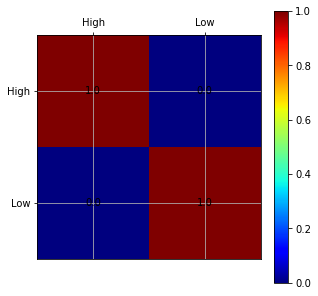


Test's observations:


,CLASS,avg_precision,avg_recall
0,High,0.900000,0.966667
1,Low,0.966667,0.900000


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


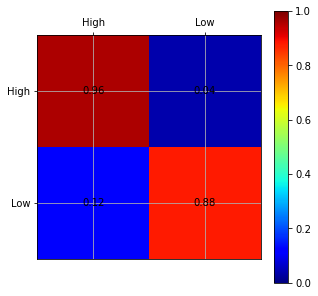



---------------------------------------------------------


In [13]:
from sklearn.linear_model import LogisticRegression
from automl_infrastructure.classifiers.adapters import SklearnClassifierAdapter
from automl_infrastructure.classifiers import EnsembleClassifier
from automl_infrastructure.experiment import Experiment
from automl_infrastructure.experiment.observations import Avg
from automl_infrastructure.experiment.params import RangedParameter, ListParameter
from automl_infrastructure.visualization import ConfusionMatrix


# create models we want to examine
lr_model = SklearnClassifierAdapter(name='lr', sklearn_model=LogisticRegression())

complex_blending_model = EnsembleClassifier(
                        name='blending', 
                        input_models=[SklearnClassifierAdapter(name='sub_lr1', sklearn_model=LogisticRegression()),
                                      SklearnClassifierAdapter(name='sub_lr2', sklearn_model=LogisticRegression())],
    
                        ensemble_model=SklearnClassifierAdapter(name='top_lr', sklearn_model=LogisticRegression())
                    )



# create hyper-params we want to optimize
hyper_parameters = {
    'blending':{
        'sub_lr1': [ListParameter('C', options=[0.1, 0.5])],
        'sub_lr2': [ListParameter('C', options=[0.1, 0.5])],
    }
}

experiment = Experiment('experiment1', cords_df[features_cols], cords_df[label_col], 
                models=[lr_model, complex_blending_model], 
                hyper_parameters=hyper_parameters, 
                observations={
                    'avg_precision': Avg(metric='precision'),
                    'avg_recall': Avg(metric='recall')
                },
                visualizations={
                    'confusion_matrix': ConfusionMatrix(figsize=(5,5))
                },
                objective='accuracy'
            )

experiment.run(n_jobs=1)
experiment.print_report(print_func=display)